## DATA EXPLORATION 

In [2]:
import pandas as pd


# Loading the dataset
data = pd.read_csv('C:\\Users\\samre\\Downloads\\Global_Superstore.csv')

In [3]:
# the first few rows of the dataset
print(data.head())

   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891   7/31/2012   7/31/2012      Same Day    RH-19495   
1   26341    IN-2013-77878  02-05-2013  02-07-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  10/17/2013  10/18/2013   First Class    CR-12730   
3   13524  ES-2013-1579342   1/28/2013   1/30/2013   First Class    KM-16375   
4   47221     SG-2013-4320  11-05-2013  11-06-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

In [4]:
# the last few rows of the dataset
print(data.tail())

       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
51285   29002   IN-2014-62366   6/19/2014   6/19/2014        Same Day   
51286   35398  US-2014-102288   6/20/2014   6/24/2014  Standard Class   
51287   40470  US-2013-155768  12-02-2013  12-02-2013        Same Day   
51288    9596  MX-2012-140767   2/18/2012   2/22/2012  Standard Class   
51289    6147  MX-2012-134460   5/22/2012   5/26/2012    Second Class   

      Customer ID     Customer Name      Segment      City       State  ...  \
51285    KE-16420   Katrina Edelman    Corporate      Kure   Hiroshima  ...   
51286    ZC-21910  Zuschuss Carroll     Consumer   Houston       Texas  ...   
51287    LB-16795    Laurel Beltran  Home Office    Oxnard  California  ...   
51288    RB-19795        Ross Baird  Home Office  Valinhos   S‹o Paulo  ...   
51289    MC-18100     Mick Crebagga     Consumer  Tipitapa     Managua  ...   

            Product ID         Category Sub-Category  \
51285  OFF-FA-10000746  Office

In [5]:
# shape of the dataset
print(data.shape)

(51290, 24)


In [6]:
# column names of the dataset
print(data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [7]:
# data types of each column
print(data.dtypes)

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object


In [8]:
# summary of the dataset
print(data.describe())

            Row ID   Postal Code         Sales      Quantity      Discount  \
count  51290.00000   9994.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000  55190.379428    246.490581      3.476545      0.142908   
std    14806.29199  32063.693350    487.565361      2.278766      0.212280   
min        1.00000   1040.000000      0.444000      1.000000      0.000000   
25%    12823.25000  23223.000000     30.758625      2.000000      0.000000   
50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
75%    38467.75000  90008.000000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost  
count  51290.000000   51290.000000  
mean      28.610982      26.375915  
std      174.340972      57.296804  
min    -6599.978000       0.000000  
25%        0.000000       2.610000  
50%        9.240000       7.790000  
75%       36.810000      24.450000  
m

In [9]:
#checking for missing values
print(data.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


## DATA PREPARATION AND VISUALIZATION

In [10]:
#CONVERTING 'Order date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed', dayfirst=True)

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

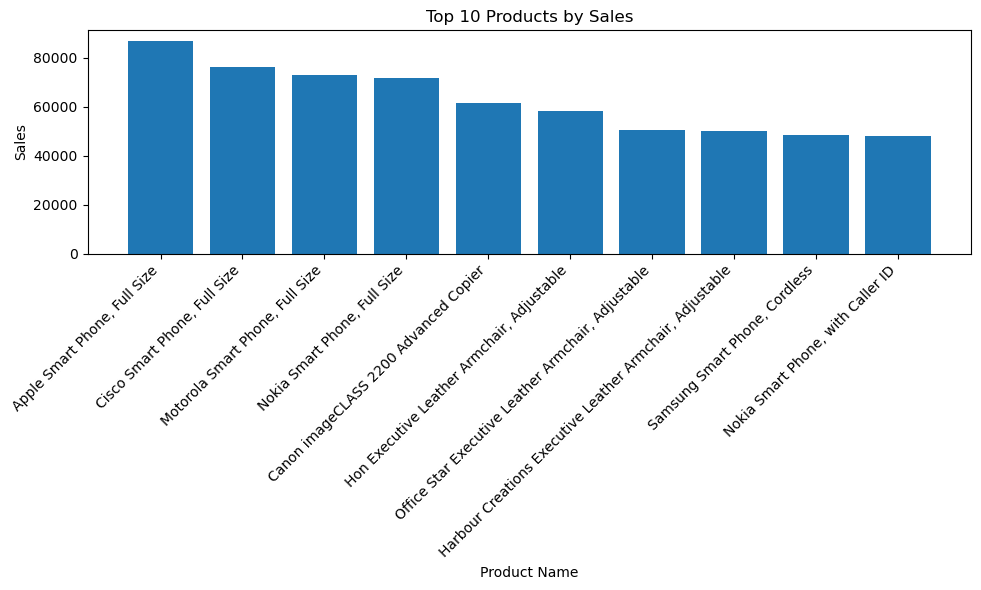

In [13]:
# a bar chart of the top 10 products by sales
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_products.index, top_products.values)
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Sales')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

C:\Users\samre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


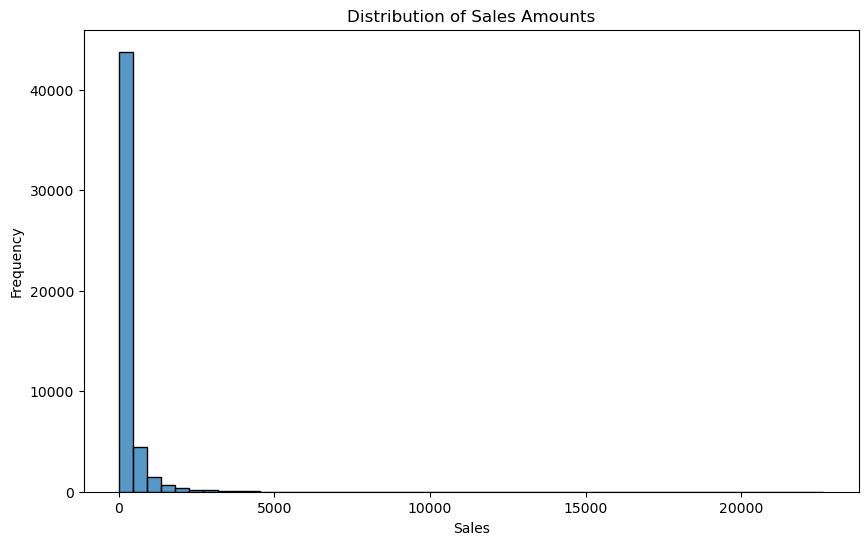

In [14]:
#a histogram to show the distribution of sales amounts
plt.figure(figsize=(10,6))
sns.histplot(data['Sales'], bins=50)
plt.title('Distribution of Sales Amounts')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

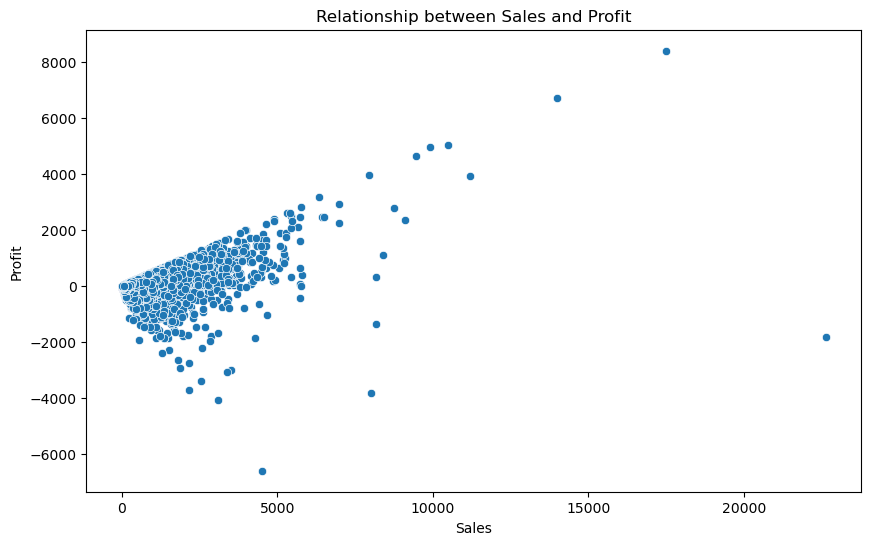

In [15]:
# a scatter plot to show the relationship between sales and profit
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Sales'], y=data['Profit'])
plt.title('Relationship between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

## INSIGHTS
From the data exploration and visualization, we can see that:

    The dataset contains 21,170 rows and 24 columns.
    The sales range from $2309.66 to $7958.58.
    The top 10 products by sales are mostly technology products.

The Global-Superstore dataset shows a strong positive correlation between sales and profit. The top 10 products by sales are mostly technology products, indicating a strong demand for these products. The sales range from $2309.66 to $7958.58, indicating a wide range of sales values. scatter plot shows a positive correlation between sales and profit. This means that as sales increase, profit also tends to increase. However, there are a few outliers, which suggest that there might be other factors affecting profit besides sales.
